### Treść zadania

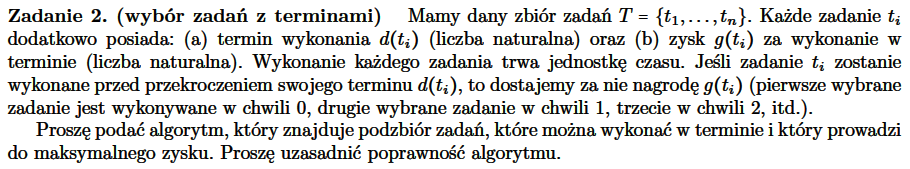

### Omówienie algorytmu

Ponieważ chcemy uzyskać największy możliwy profit, zawsze opłaca nam się brać zadanie, za które otrzymamy największy zysk. Oczywiście zadanie ma pewien górny limit czasu wykonania i nie może jego moment wykonania kolidować z chwilą wykonywania żadnego innego zadania. W tym celu, najlepiej stworzyć coś w rodzaju siatki godzin - tablicy slotów na zadania, w której będziemy umieszczać informacje, czy w danym przedziale czasu mamy czas wolny i możemy w nim wykonać nowe zadanie, czy już czas jest zajęty. Oczywiście zadania musimy umieszczać tylko w tych przedziałach, które mieszczą się przed limitem oraz są wolne (nie ma innych zadań, które już wykonujemy w tym czasie).
<br><br>
Ponieważ znamy już powyższe założenia, konieczne jest posortowanie najpierw zadań według profitów, bo zawsze będziemy brali takie zadanie z pozostałych, które da nam najwięcej zysku i jednocześnie da się wykonać (jest, gdzie je upchnąć w grafik). Następnie, będziemy przechodzić liniowo przez tablicę par $ (limit\_czasu\_wykonania, profit) $ i dla każdego kolejnego zadania (które jest zadaniem o największym proficie spośród pozostałych), będziemy sprawdzać, poczynając od ostatniego dopuszczalnego bloku czasu (ostatniej sekundy - tej, która rozpoczyna się jednostkę czasu przed limitem czasu wykonania zadania), czy istnieje taki slot (jak najpóźniejszy) w siatce godzin, w którym można zmieścić to zadanie. Jeżeli okaże się, że tak, zapisujemy w odpowiednim slocie informację, że w tym czasie będziemy wykonywać nowe zadanie i dodajemy to zadanie do rozwiązania. Jeżeli nie, to oznacza, że w danym limicie czasu na zadanie już zapisaliśmy inne zadania wcześniej, które musiały dawać większy profit od obecnie sprawdzanego (wszystkie z nich dawały większy profit). Wynika to stąd, że każde kolejne zadanie daje profit nie większy niż poprzednie, a więc to obecnie sprawdzane zadanie i tak się nam nie opłaca, więc je pomijamy, bo byćmoże znajdzie się później jeszcze inne zadanie, które ma większy limit czasu i dla tego limitu czasu wciąż są jakieś sloty wolne.

###### LINK: https://www.geeksforgeeks.org/job-sequencing-problem/

### Złożoność

###### Obliczeniowa:
$ O(t \cdot n + n \cdot log(n)) $, gdzie $ n $ - liczba zadań, $ t $ - maksymalny czas wykonania jednego z zadań (o tyle kroków się maksymalnie cofniemy w poszukiwaniu wolnego miejsca - bardzo rzadki przypadek)
###### Pamięciowa:
$ O(t) $ - ponieważ mamy tyle slotów, ile wynosi maksymalny limit czasu wykonania jednego z zadań oraz zawsze możemy mieć maksymalnie $ t $ zadań w tablicy wynikowej (tyle, ile jest slotów).

### Implementacja

In [1]:
def tasks(T: '(time limit, profit)'):
    # Sort all tasks by their profit
    T.sort(key=lambda task: task[1])
    # Get the max time limit possible
    limit = 0
    for task in T:
        if task[0] > limit:
            limit = task[0]
    # Create slots in which we will store information which
    # time periods are taken by more profitable tasks (do each task
    # the latest we can in order to leave some space for tasks which
    # need to be done earlier)
    result = []
    slots = [False] * limit
    for task in T:
        for i in range(task[0] - 1, -1, -1):
            if not slots[i]:
                slots[i] = True
                result.append(task)
                break
    return result

###### Kilka testów

In [2]:
A = [[2, 50],
     [1, 21],
     [2, 27],
     [3, 25],
     [2, 15]
]

print(tasks(A))

[[2, 15], [1, 21], [3, 25]]
